<a href="https://colab.research.google.com/github/naufalbaihaqiz/Deep-Learning-CNN/blob/main/Deep_Learning_Prject_a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Set Path Dataset

In [2]:
import os

# Ganti path sesuai lokasi dataset kamu di Drive
base_dir = "/content/drive/MyDrive/Glasses_Classification"

train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "validate")
test_dir = os.path.join(base_dir, "test")


#Import Library

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np


# Data Augmentation & Preprocessing

In [4]:
# Augmentasi data train
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# Validasi & test → hanya normalisasi
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load dataset
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=8,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=8,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=1,
    class_mode='binary',
    shuffle=False
)


Found 104 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


#Bangun Model MobileNetV2

In [5]:
# Load base model MobileNetV2 tanpa top layer
base_model = MobileNetV2(
    input_shape=(128, 128, 3),
    include_top=False,
    weights='imagenet'
)

# Bekukan semua layer awal (transfer learning)
base_model.trainable = False

# Tambah classifier di atasnya
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,259,265 (8.62 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

#Training Model

In [6]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[early_stop]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 54s 4s/step - accuracy: 0.6305 - loss: 0.7180 - val_accuracy: 0.5500 - val_loss: 0.7019
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 35s 166ms/step - accuracy: 0.7279 - loss: 0.5415 - val_accuracy: 0.7500 - val_loss: 0.5250
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 162ms/step - accuracy: 0.7712 - loss: 0.4595 - val_accuracy: 0.7000 - val_loss: 0.5531
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 167ms/step - accuracy: 0.8528 - loss: 0.4129 - val_accuracy: 0.8250 - val_loss: 0.4148
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 231ms/step - accuracy: 0.8632 - loss: 0.3381 - val_accuracy: 0.8250 - val_loss: 0.4249
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - accuracy: 0.9142 - loss: 0.3080 - val_accuracy: 0.8250 - val_loss: 0.3793
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 161ms/step - accuracy: 0.8687 - loss: 0.3478 - val_accuracy: 0.8250 - val_loss: 0.3575
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 161ms/step - accuracy: 0.9237 - loss: 0.2906 - val_accuracy: 0.8

#Evaluasi di Test Set

In [7]:
loss, acc = model.evaluate(test_generator)
print(f"Test Accuracy: {acc*100:.2f}%")


20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 238ms/step - accuracy: 1.0000 - loss: 0.1098
Test Accuracy: 100.00%


#Prediksi Contoh

In [8]:
preds = model.predict(test_generator)
pred_labels = (preds > 0.5).astype(int).flatten()

# Tampilkan 10 hasil prediksi pertama
class_indices = {v: k for k, v in train_generator.class_indices.items()}
for i in range(20):
    print(f"Gambar {i+1}: Prediksi = {class_indices[pred_labels[i]]}")


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step
Gambar 1: Prediksi = glasses
Gambar 2: Prediksi = glasses
Gambar 3: Prediksi = glasses
Gambar 4: Prediksi = glasses
Gambar 5: Prediksi = glasses
Gambar 6: Prediksi = glasses
Gambar 7: Prediksi = glasses
Gambar 8: Prediksi = glasses
Gambar 9: Prediksi = glasses
Gambar 10: Prediksi = glasses
Gambar 11: Prediksi = noglasses
Gambar 12: Prediksi = noglasses
Gambar 13: Prediksi = noglasses
Gambar 14: Prediksi = noglasses
Gambar 15: Prediksi = noglasses
Gambar 16: Prediksi = noglasses
Gambar 17: Prediksi = noglasses
Gambar 18: Prediksi = noglasses
Gambar 19: Prediksi = noglasses
Gambar 20: Prediksi = noglasses


#Visualisasi Hasil Pelatihan

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


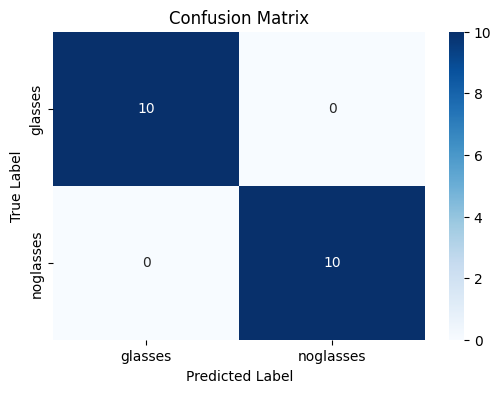


Classification Report:
              precision    recall  f1-score   support

     glasses       1.00      1.00      1.00        10
   noglasses       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [9]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Ambil label asli dan prediksi
y_true = test_generator.classes
y_pred = (model.predict(test_generator) > 0.5).astype(int).flatten()

# Buat confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Tampilkan classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))


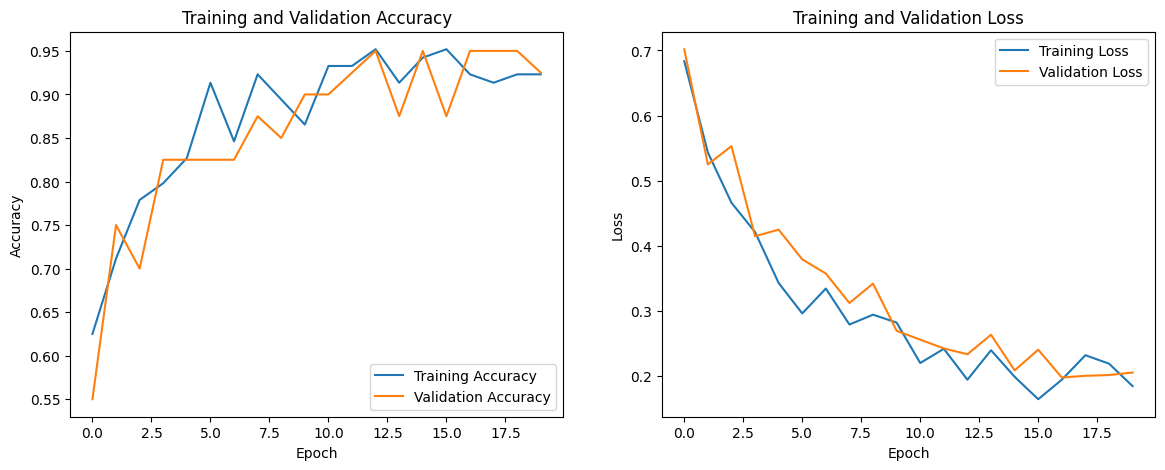

In [10]:
# Mengambil riwayat akurasi dan loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

# Membuat plot
plt.figure(figsize=(14, 5))

# Plot Akurasi
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

# Coba tes gambar baru

Saving shutterstock_648907024.webp to shutterstock_648907024.webp
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


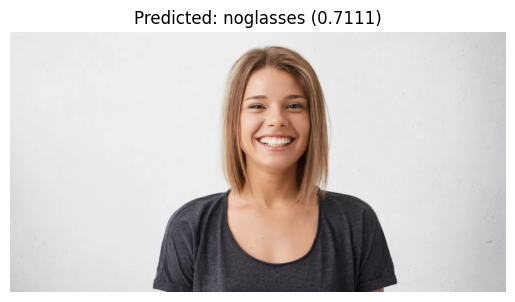

In [11]:
import numpy as np
from tensorflow.keras.preprocessing import image
from google.colab import files

# Upload gambar manual
uploaded = files.upload()

for fname in uploaded.keys():
    img_path = fname

    # Load dan preprocess gambar
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Prediksi
    prediction = model.predict(img_array)
    class_labels = list(train_generator.class_indices.keys())
    predicted_class = class_labels[int(prediction[0][0] > 0.5)]

    # Tampilkan hasil
    plt.imshow(image.load_img(img_path))
    plt.axis('off')
    plt.title(f"Predicted: {predicted_class} ({prediction[0][0]:.4f})")
    plt.show()


In [12]:
# Path folder dataset
dataset_dir = "/content/drive/MyDrive/Glasses_Classification"

# Simpan model ke dalam folder dataset
model_save_path = f"{dataset_dir}/model_glasses_mobilenetv2.h5"
model.save(model_save_path)

print(f"Model berhasil disimpan di: {model_save_path}")


Model berhasil disimpan di: /content/drive/MyDrive/Glasses_Classification/model_glasses_mobilenetv2.h5
